<a href="https://colab.research.google.com/github/Benzarti-Ahmed-Yassine/fatigue-project/blob/master/TPEAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import gradio as gr


In [3]:
!wget -q https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
data = pd.read_csv('insurance.csv')
print("dataset :")
display(data.head())

dataset :


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

In [5]:
X = data.drop("expenses", axis=1)
y = data["expenses"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = MLPRegressor(
    hidden_layer_sizes=(1024,512,256,128,64,32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.0005,
    #alpha=0.0005,
    batch_size=32,
    max_iter=2000,
    early_stopping=True,
    warm_start=True,
    random_state=42
)

epochs = 100
losses = []
mae_scores = []
r2_scores = []
accuracy_scores = []

print("🚀 Entraînement en cours...\n")

for epoch in range(epochs):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = 1 - (mae / y_test.mean())

    mae_scores.append(mae)
    r2_scores.append(r2)
    accuracy_scores.append(accuracy)
    losses.append(model.loss_)

    # ✅ Affiche chaque epoch ou toutes les 10 itérations
    if (epoch+1) % 1 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} | Loss: {model.loss_:.2f} | MAE: {mae:.2f} | R²: {r2:.3f} | Accuracy≈ {accuracy*100:.2f}%")

print("\n✅ Kamalna ! ")


🚀 Entraînement en cours...

Epoch 1/100 | Loss: 10808151.99 | MAE: 2764.99 | R²: 0.868 | Accuracy≈ 78.68%
Epoch 2/100 | Loss: 10954308.63 | MAE: 2630.77 | R²: 0.871 | Accuracy≈ 79.71%
Epoch 3/100 | Loss: 11272335.88 | MAE: 2669.44 | R²: 0.867 | Accuracy≈ 79.42%
Epoch 4/100 | Loss: 11213335.03 | MAE: 2637.43 | R²: 0.869 | Accuracy≈ 79.66%
Epoch 5/100 | Loss: 11179541.53 | MAE: 2635.48 | R²: 0.869 | Accuracy≈ 79.68%
Epoch 6/100 | Loss: 11150936.25 | MAE: 2627.50 | R²: 0.869 | Accuracy≈ 79.74%
Epoch 7/100 | Loss: 11122729.24 | MAE: 2621.71 | R²: 0.869 | Accuracy≈ 79.78%
Epoch 8/100 | Loss: 11096300.44 | MAE: 2616.59 | R²: 0.869 | Accuracy≈ 79.82%
Epoch 9/100 | Loss: 11068089.33 | MAE: 2607.68 | R²: 0.869 | Accuracy≈ 79.89%
Epoch 10/100 | Loss: 11043138.49 | MAE: 2606.89 | R²: 0.869 | Accuracy≈ 79.90%
Epoch 11/100 | Loss: 11014462.52 | MAE: 2600.69 | R²: 0.869 | Accuracy≈ 79.95%
Epoch 12/100 | Loss: 10987197.52 | MAE: 2596.54 | R²: 0.870 | Accuracy≈ 79.98%
Epoch 13/100 | Loss: 10961204.18 

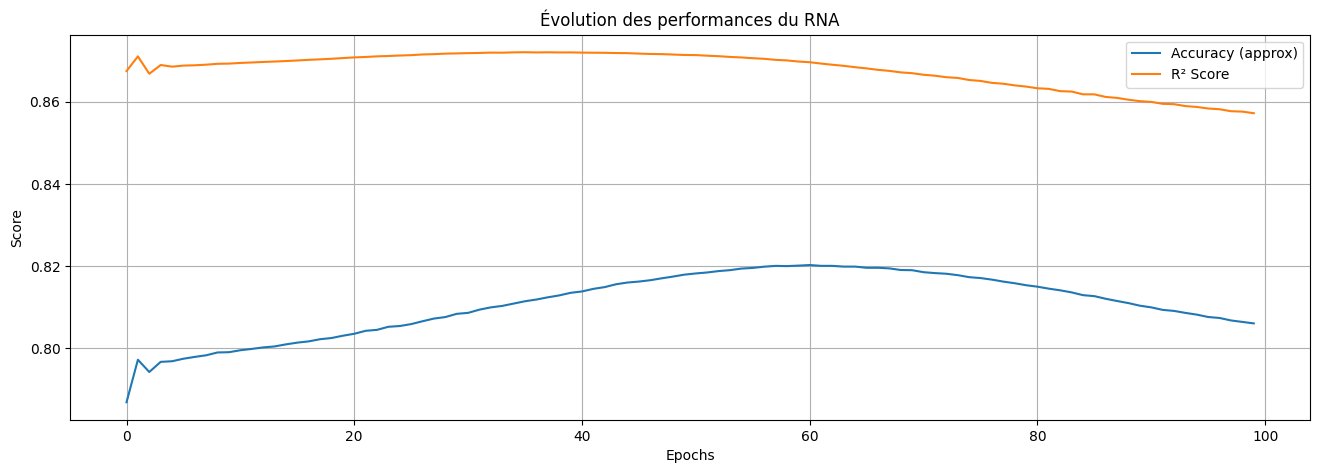

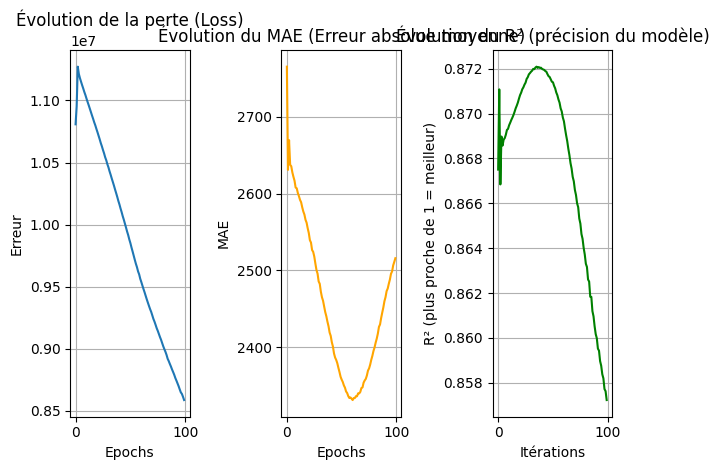

In [12]:
plt.figure(figsize=(16,5))

plt.plot(accuracy_scores, label='Accuracy (approx)')
plt.plot(r2_scores, label='R² Score')
plt.title("Évolution des performances du RNA")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


plt.subplot(1,3,1)
plt.plot(losses)
plt.title("Évolution de la perte (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Erreur")
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(mae_scores, color='orange')
plt.title("Évolution du MAE (Erreur absolue moyenne)")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(r2_scores, color='green')
plt.title("Évolution du R² (précision du modèle)")
plt.xlabel("Itérations")
plt.ylabel("R² (plus proche de 1 = meilleur)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
def predict_health_cost(age, sex, bmi, children, smoker, region):
    # Encodage des entrées
    sex = 1 if sex == "male" else 0
    smoker = 1 if smoker == "yes" else 0
    region_map = {"southwest":0, "southeast":1, "northwest":2, "northeast":3}
    region = region_map.get(region, 0)

    # Préparation des données
    user_data = np.array([[age, sex, bmi, children, smoker, region]])
    user_data_scaled = scaler.transform(user_data)

    # Prédiction
    prediction = model.predict(user_data_scaled)[0]
    return f"💰 Estimation du coût de santé : ${prediction:.2f}"


In [14]:
interface = gr.Interface(
    fn=predict_health_cost,
    inputs=[
        gr.Slider(18, 80, value=30, label="Âge"),
        gr.Radio(["male", "female"], label="Sexe"),
        gr.Slider(15, 45, value=25, label="IMC (BMI)"),
        gr.Slider(0, 5, step=1, value=0, label="Nombre d'enfants"),
        gr.Radio(["yes", "no"], label="Fumeur ?"),
        gr.Radio(["southwest", "southeast", "northwest", "northeast"], label="Région")
    ],
    outputs="text",
    title="🩺 Prédiction du coût de santé (RNA)",
    description="Entrez les informations d'une personne pour estimer son coût de santé annuel."
)

# Lancer l'interface
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e61eb2a9a4e8996134.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
